<h1>Text Summarization of Covid-19 Dataset</h1>

<h2>Importing required libraries</h2>

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
import glob

from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en import English
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishaanpasricha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ishaanpasricha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<h2>Loading model</h2>

In [30]:
nlp = English()
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [31]:
files = [open(file,'rb') for file in glob.glob("/Users/ishaanpasricha/Documents/Thapar/Sem 5/ELC/COVID_19_dataset/documents/*")]

In [32]:
text =[]
for f in files:
    t1 = f.read()
    text.append(t1)
    f.close()

In [33]:
master_text = ' '.join(map(str, text)) 

<h2>Tokenization</h2>

In [34]:
sent_token = nltk.sent_tokenize(master_text)
word_token = nltk.word_tokenize(master_text)

word_tokens_lower = [ word.lower() for word in word_token]

stopWords = stopwords.words('english')

word_token_refined = [ word for word in word_tokens_lower if word not in stopWords]

<h2>Lemmatization</h2>

In [35]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lm = WordNetLemmatizer()
lem = []
for word in word_token_refined:
    lem.append(lm.lemmatize(word))
word_token_refined = lem

print(len(word_token))
print(len(word_token_refined))

4618
2947


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ishaanpasricha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h2>PorterStemmer</h2>

In [36]:
ps = PorterStemmer()
stem = []
for word in word_token_refined:
    stem.append(ps.stem(word))
word_token_refined = stem

<h2>Frequency Distribution</h2>

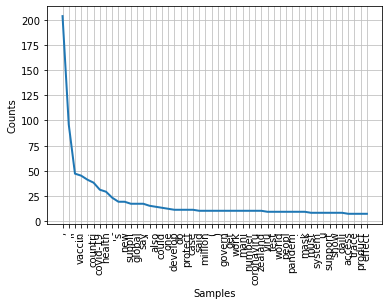

In [37]:
from nltk.probability import FreqDist
fdist = FreqDist(word_token_refined)
#print(fdist)
import matplotlib.pyplot as plt
fdist.plot(50,cumulative=False)
plt.show()

<h2>Create Frequency Distribution of words in the document</h2>

In [38]:
FreqTable={}
for word in word_token_refined:
    if word in FreqTable:
        FreqTable[word]+=1
    else:
        FreqTable[word]=1

In [39]:
sent_value= {}

for sent in sent_token:
    sent_value[sent] = 0
    for word,freq in FreqTable.items():
        if word in sent.lower():
            sent_value[sent] = sent_value[sent] + freq

In [40]:
sum = 0
for sent in sent_value:
    sum +=sent_value[sent]
avg = int(sum/len(sent_value))

summary = ""

for sent in sent_value:
    if (sent_value[sent] >= 1.2*avg):
        summary = summary + " " + sent

In [41]:
print(summary)

 On 24 April, WHO launched the Access to COVID-19 Tools (ACT) Accelerator, which is a global collaboration to accelerate development, production and equitable access to COVID-19 tests, treatments and vaccines. When a safe and effective vaccine is available, Gavi\x92s COVAX Advance Market Commitment (AMC), will be used to pay for the doses allocated to developing countries. In addition to accelerating research and ensuring manufacturing capacity for COVID-19 vaccines, WHO has supported the Royal Government of Cambodia to strengthen its regulatory capacity, draft a COVID-19 National Deployment and Vaccination Plan (NDVP) and assess immunization supply chain management. b'World Health Assembly charts course for COVID-19 response and global health priorities.\r\nAs health leaders prepare to gather for a virtual session of the resumed 73rd World Health Assembly (WHA), WHO has three messages to share. b'Success from two leading coronavirus vaccine programs likely means other frontrunners wil

<h1>Term Frequency Inverse Data Frequency (TFIDF) Vectorizer</h1>

In [42]:
doc = nlp(master_text.replace("\n", ""))
sentences = [sent.string.strip() for sent in doc.sents]

In [43]:
sentence_organizer = {k:v for v,k in enumerate(sentences)}

<h2>Creating TF-IDF model</h2>

In [44]:
tf_idf_vectorizer = TfidfVectorizer(min_df=2,  max_features=None, 
                                    strip_accents='unicode', 
                                    analyzer='word',
                                    token_pattern=r'\w{1,}',
                                    ngram_range=(1, 3), 
                                    use_idf=1,smooth_idf=1,
                                    sublinear_tf=1,
                                    stop_words = 'english')

In [45]:
tf_idf_vectorizer.fit(sentences)

TfidfVectorizer(min_df=2, ngram_range=(1, 3), smooth_idf=1,
                stop_words='english', strip_accents='unicode', sublinear_tf=1,
                token_pattern='\\w{1,}', use_idf=1)

In [46]:
# Transforming our sentences to TF-IDF vectors
sentence_vectors = tf_idf_vectorizer.transform(sentences)

<h2>Performing sentence scoring</h2>

In [47]:
# Getting sentence scores for each sentences
sentence_scores = np.array(sentence_vectors.sum(axis=1)).ravel()

# Sanity checkup
print(len(sentences) == len(sentence_scores))

True


In [48]:
# Getting top-n sentences
N = 3
top_n_sentences = [sentences[ind] for ind in np.argsort(sentence_scores, axis=0)[::-1][:N]]

<h2>Performing final summarization</h2>

In [49]:
# Let's now do the sentence ordering using our prebaked sentence_organizer
# Let's map the scored sentences with their indexes
mapped_top_n_sentences = [(sentence,sentence_organizer[sentence]) for sentence in top_n_sentences]
print("Our top_n_sentence with their index: \n")
for element in mapped_top_n_sentences:
    print(element)

# Ordering our top-n sentences in their original ordering
mapped_top_n_sentences = sorted(mapped_top_n_sentences, key = lambda x: x[1])
ordered_scored_sentences = [element[0] for element in mapped_top_n_sentences]

# Our final summary
summary = " ".join(ordered_scored_sentences)

Our top_n_sentence with their index: 

('Concerned that COVID-19 could be transmitted through New Zealand to Pacific island countries \\x96 which are some of the only places still free of COVID-19 \\x96 the Ministry of Health and Ministry of Foreign Affairs and Trade worked closely with WHO to support their neighbours in the Pacific.', 61)
('Concerned that COVID-19 could be transmitted through New Zealand to Pacific island countries \\x96 which are some of the only places still free of COVID-19 \\x96 the Ministry of Health and Ministry of Foreign Affairs and Trade worked closely with WHO to support their neighbours in the Pacific.', 61)
("All bars and restaurants are closed for four weeks.\\r\\n\\r\\nInfection numbers are climbing throughout Europe, prompting new restrictions across the continent.\\r\\n\\r\\nItaly announced a raft of measures on Sunday after recording its highest daily infection rate, while nine major French cities have been placed under curfew.\\r\\n\\r\\nThe Czech Re

In [50]:
print(summary)

Concerned that COVID-19 could be transmitted through New Zealand to Pacific island countries \x96 which are some of the only places still free of COVID-19 \x96 the Ministry of Health and Ministry of Foreign Affairs and Trade worked closely with WHO to support their neighbours in the Pacific. Concerned that COVID-19 could be transmitted through New Zealand to Pacific island countries \x96 which are some of the only places still free of COVID-19 \x96 the Ministry of Health and Ministry of Foreign Affairs and Trade worked closely with WHO to support their neighbours in the Pacific. All bars and restaurants are closed for four weeks.\r\n\r\nInfection numbers are climbing throughout Europe, prompting new restrictions across the continent.\r\n\r\nItaly announced a raft of measures on Sunday after recording its highest daily infection rate, while nine major French cities have been placed under curfew.\r\n\r\nThe Czech Republic - which has the highest infection rate on the continent - is consi

<h1>Question Answer</h1>

<h3>Question</h3>
    <h4>What is WHO's verdict on COVID-19?</h4>

In [51]:
# Question Answer
count=0
who_verdict = ""
for sent in sent_value:
    if ("WHO" in sent):
        if (sent_value[sent] >= 1.2*avg):
            who_verdict = who_verdict + "\n" + sent
            count +=1

            

quest = "What is WHO's verdict on COVID-19?"
answer = who_verdict

In [52]:
print(answer)


On 24 April, WHO launched the Access to COVID-19 Tools (ACT) Accelerator, which is a global collaboration to accelerate development, production and equitable access to COVID-19 tests, treatments and vaccines.
In addition to accelerating research and ensuring manufacturing capacity for COVID-19 vaccines, WHO has supported the Royal Government of Cambodia to strengthen its regulatory capacity, draft a COVID-19 National Deployment and Vaccination Plan (NDVP) and assess immunization supply chain management.
b'World Health Assembly charts course for COVID-19 response and global health priorities.\r\nAs health leaders prepare to gather for a virtual session of the resumed 73rd World Health Assembly (WHA), WHO has three messages to share.
Private firms play a key role in terms of both testing and tracing, which has meant some of the local expertise available in the NHS, universities and councils has been bypassed.\r\n' b'New Zealand takes early and hard action to tackle COVID-19.\r\n\r\nThre